In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=727950dd75a16e37952b728394458968cd9d5eb9e1c427d6bff30584441044ed
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=76f470316753b4768b7a6705074e512700cd4e73ef301e24891ddaab7bc4f649
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import yfinance as yf
import pandas as pd

In [10]:
Infy = yf.download(tickers='INFY.NS', period = '2y', interval = '1d')['Adj Close']
Infy.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-07-22    10.930841
2019-07-23    10.959457
2019-07-24    10.930841
2019-07-25    10.988071
2019-07-26    10.949918
Name: Adj Close, dtype: float64

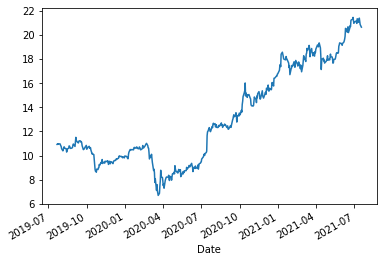

In [5]:
import matplotlib.pyplot as plt
Infy.plot()
plt.show()

In [6]:
pip install Prophet

     |████████████████████████████████| 65 kB 548 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.6 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644235 sha256=c1eea5cf2518ee4ca100eab66a9d2d0b03b47d5668ccdb8f3482676643c13e05
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [22]:
from fbprophet import Prophet
import warnings
import datetime as dt
warnings.simplefilter(action='ignore',category=FutureWarning)
Infosys_price = yf.download(tickers='INFY.NS', period = '20y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [23]:
modelfb = Prophet()
Infosys_price = Infosys_price.reset_index()
Infosys_price[['ds','y']] = Infosys_price[['Date','Adj Close']]
modelfb.fit(Infosys_price)
future = modelfb.make_future_dataframe(periods=180)


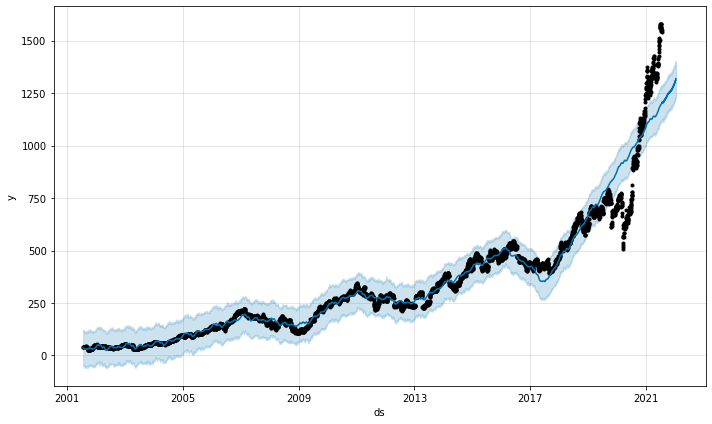

In [24]:
forecast = modelfb.predict(future)
modelfb.plot(forecast)
plt.show()

In [25]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()